In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = 'mtn_customer_churn.csv'

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "oluwademiladeadeniyi/mtn-nigeria-customer-churn",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

C:\Users\Henry\AppData\Local\Temp\ipykernel_13364\252350511.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


---

# EDA

🧾 Dataset Structure
This dataset contains 974 rows of customer entries and the following columns:

- Customer ID: A unique identifier assigned to each customer. May appear more than once if the customer owns multiple devices.
- Full Name: The full name of the customer. Names reflect a balance across Nigerian ethnicities and regions.
- Date of Purchase: Month and year the device or plan was purchased. All entries are from 2025.
- Age: Age of the customer (between 16 and 80). Rules apply to age and purchasing behavior.
- State: Nigerian state where the customer resides, including the FCT.
- MTN Device: Device purchased by the customer. Includes: Mobile SIM Card, Broadband MiFi, 4G Router, 5G Broadband Router.
- Gender: Gender of the customer (Male or Female).
- Satisfaction Rate: A score from 0 to 5 reflecting the customer’s satisfaction.
- Customer Review: Categorical review of the customer experience: Poor, Fair, Good, Very Good, Excellent.
- Customer Tenure in months: How long the customer has been subscribed (in months).
- Subscription Plan: The name of the MTN data plan purchased (e.g., 60GB Monthly Broadband Plan, 7GB Monthly Plan, etc.).
- Unit Price: Cost of the data plan in Nigerian Naira (₦).
- Data Usage: Estimated data usage in gigabytes (GB). Not necessarily equal to the plan size—it reflects usage behavior.
- Number of Times Purchased: How many times the plan was purchased within the month (simulates customer consumption rate).
- Total Revenue: Total amount spent by the customer (calculated as Unit Price × Number of Times Purchased).
- Customer Churn Status: Indicates whether the customer has churned (Yes) or is still active (No).
- Reasons for Churn: If churned, this field shows the reason (e.g., Poor Network, Relocation, High Call Tariffs, etc.). Empty for active customers.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [3]:
df.head()

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN


In [4]:
df.dtypes

Customer ID                   object
Full Name                     object
Date of Purchase              object
Age                            int64
State                         object
MTN Device                    object
Gender                        object
Satisfaction Rate              int64
Customer Review               object
Customer Tenure in months      int64
Subscription Plan             object
Unit Price                     int64
Number of Times Purchased      int64
Total Revenue                  int64
Data Usage                   float64
Customer Churn Status         object
Reasons for Churn             object
dtype: object

In [5]:
df.isnull().sum()

Customer ID                    0
Full Name                      0
Date of Purchase               0
Age                            0
State                          0
MTN Device                     0
Gender                         0
Satisfaction Rate              0
Customer Review                0
Customer Tenure in months      0
Subscription Plan              0
Unit Price                     0
Number of Times Purchased      0
Total Revenue                  0
Data Usage                     0
Customer Churn Status          0
Reasons for Churn            690
dtype: int64

In [6]:
df['Customer Churn Status'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
label_churn_status = LabelEncoder()

df['Customer_Churn_Status_Label'] = label_churn_status.fit_transform(df['Customer Churn Status'])

In [8]:
df[['Customer Churn Status', 'Customer_Churn_Status_Label']].head()

,Customer Churn Status,Customer_Churn_Status_Label
0,Yes,1
1,Yes,1
2,No,0
3,No,0
4,No,0


<Axes: >

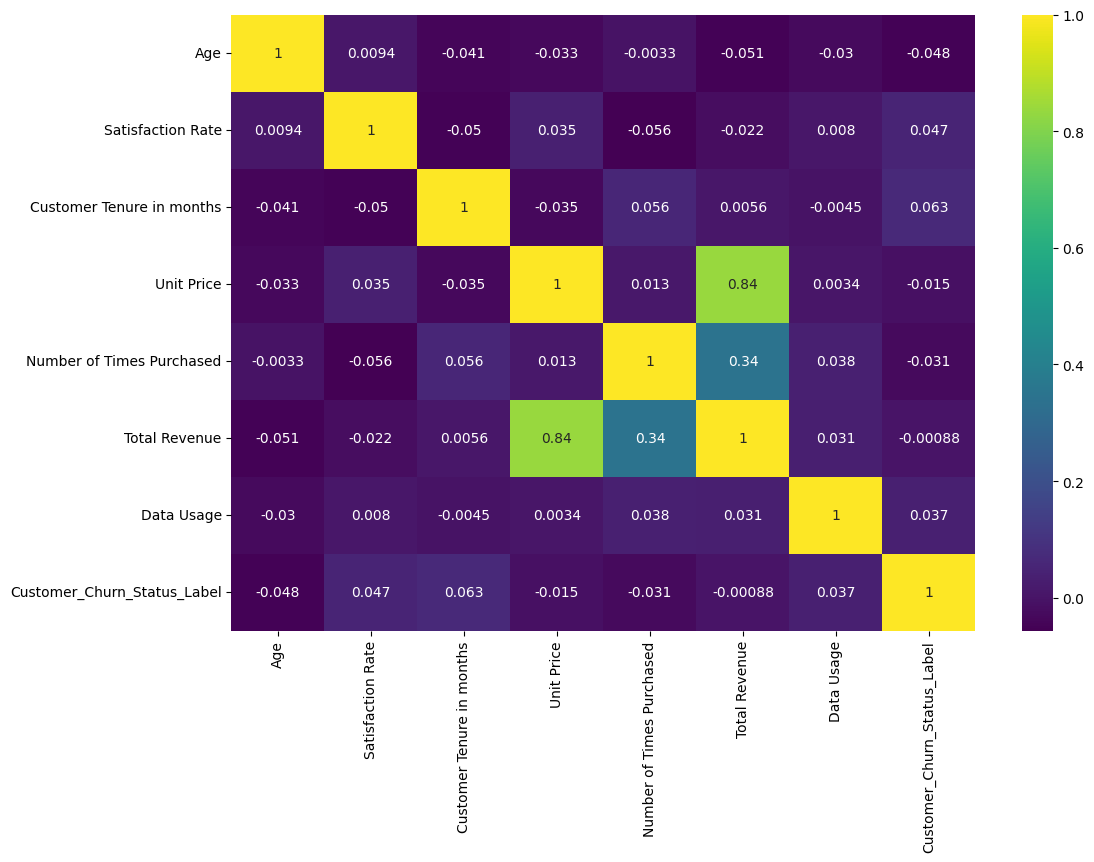

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')

<Axes: xlabel='Customer Churn Status', ylabel='count'>

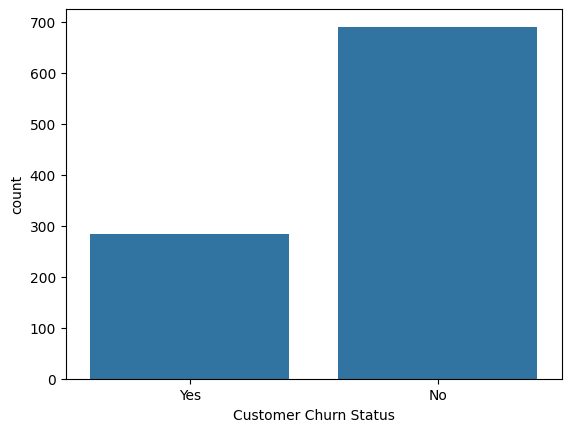

In [10]:
sns.countplot(x='Customer Churn Status', data=df)

<Axes: xlabel='Customer Churn Status', ylabel='Satisfaction Rate'>

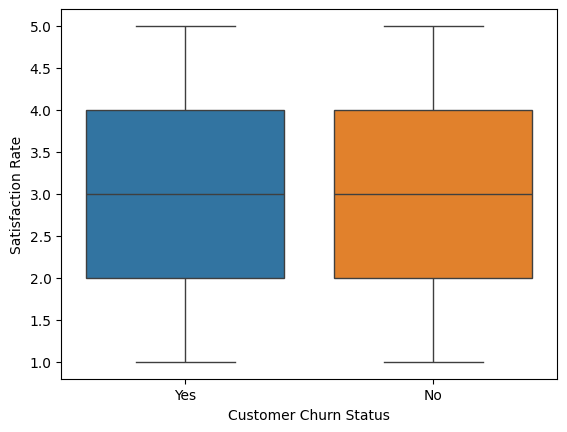

In [11]:
# Satisfaction Rate vs. Customer Churn Status
sns.boxplot(y='Satisfaction Rate', x='Customer Churn Status', data=df, hue='Customer Churn Status')

<Axes: xlabel='Age', ylabel='Density'>

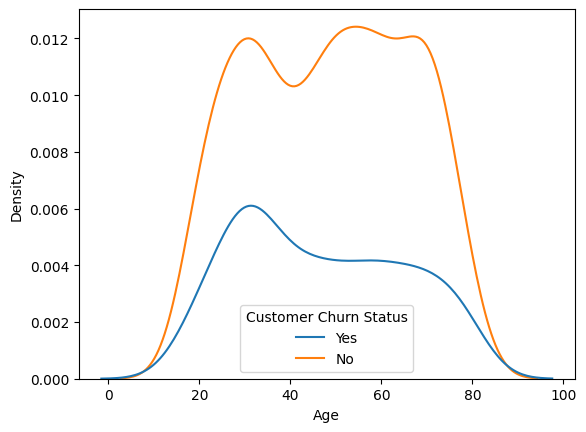

In [12]:
# Age x Churn Status
sns.kdeplot(x='Age', data=df, hue='Customer Churn Status')

<Axes: xlabel='Gender', ylabel='Count'>

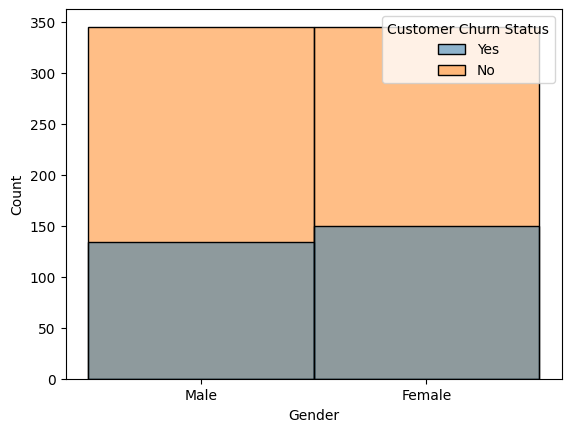

In [13]:
# Gender x Churn Status
sns.histplot(x='Gender', data=df, hue='Customer Churn Status')

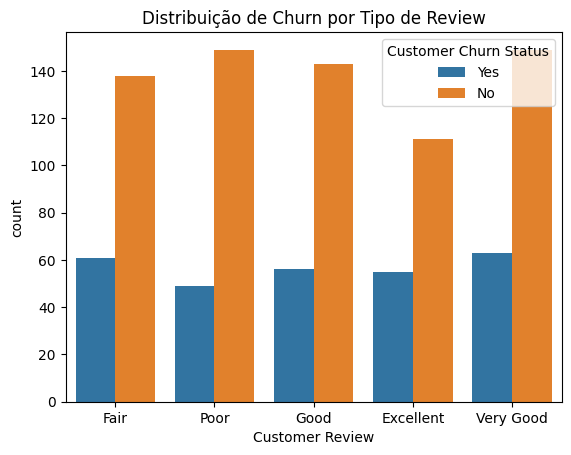

In [14]:
sns.countplot(data=df, x='Customer Review', hue='Customer Churn Status')
plt.title("Distribuição de Churn por Tipo de Review")
plt.show()

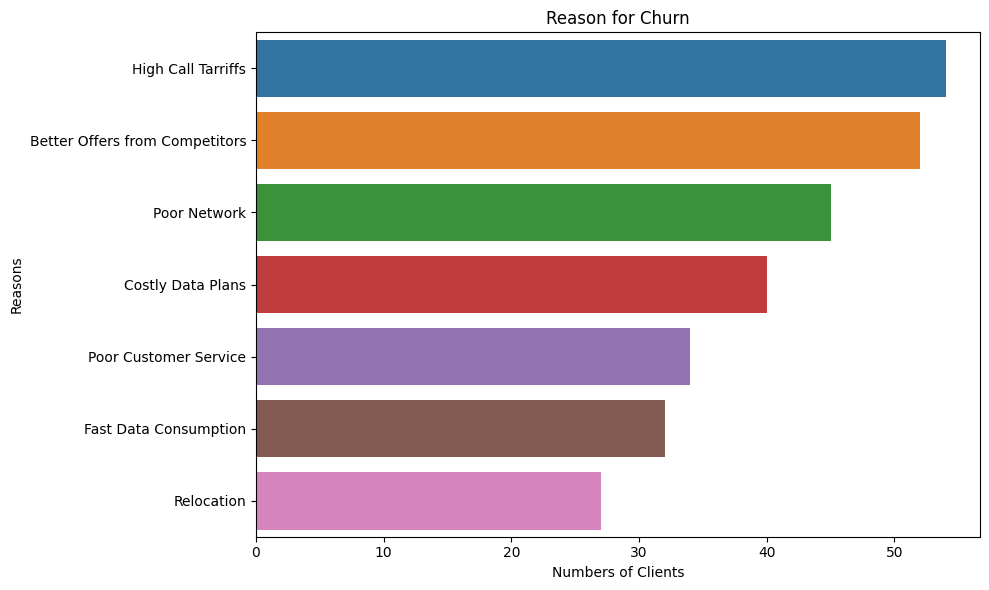

In [15]:
churned = df[df['Customer Churn Status'] == 'Yes']

reasons_counts = churned['Reasons for Churn'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=reasons_counts.values, y=reasons_counts.index, hue=reasons_counts.index)
plt.title('Reason for Churn')
plt.xlabel('Numbers of Clients')
plt.ylabel('Reasons')
plt.tight_layout()
plt.show()

## Conslusion

Existe uma grande diferença entre casos de Churn e não Churn, o que pode influenciar na falta de correlação entre a `Satisfaction Rate` e `Customer Churn Status`.

Os casos de Churn tem a maior probabilidade de acontencer com clientes de idade entre 25 a 35 anos.

Os feedbacks de clientes não condiz com `Churn`, já que o feedback `Excellent` tem uma chance maior de churn do que `Poor`.

Os motivos de maior `Churn` são `High Call Tarrifs` e `Betters Offers from Competitors`

`Reasons for Churn` == NaN, são consumidores ativos

# Preprocessing

In [16]:
df.head(1)

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn,Customer_Churn_Status_Label
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation,1


In [17]:
# A Reasons For Churn é uma variável preenchida somente após a saída do cliente, sendo um data leakage para o modelo
df.drop(['Customer ID', 'Full Name', 'Date of Purchase', 'State', 'Reasons for Churn'], axis=1, inplace=True)

---

In [18]:
df['MTN Device'].unique()

array(['4G Router', 'Mobile SIM Card', '5G Broadband Router',
       'Broadband MiFi'], dtype=object)

In [19]:
df = pd.get_dummies(df, columns=['MTN Device'], dtype=int)

In [20]:
df.head(1)

,Age,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Customer_Churn_Status_Label,MTN Device_4G Router,MTN Device_5G Broadband Router,MTN Device_Broadband MiFi,MTN Device_Mobile SIM Card
0,27,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,1,1,0,0,0


---

In [21]:
label_gender = LabelEncoder()

df['Gender_Cat'] = label_gender.fit_transform(df['Gender'])

In [22]:
df[['Gender', 'Gender_Cat']].head()

,Gender,Gender_Cat
0,Male,1
1,Female,0
2,Male,1
3,Male,1
4,Male,1


In [23]:
df.drop('Gender', axis=1, inplace=True)

---

In [24]:
df['Customer Review'].unique()

array(['Fair', 'Poor', 'Good', 'Excellent', 'Very Good'], dtype=object)

In [25]:
review_map = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent':4,
}

df['Customer_Review_Cat'] = df['Customer Review'].map(review_map)

df[['Customer Review', 'Customer_Review_Cat']].head()

,Customer Review,Customer_Review_Cat
0,Fair,1
1,Fair,1
2,Poor,0
3,Poor,0
4,Poor,0


In [26]:
df.drop('Customer Review', axis=1, inplace=True)

---

In [27]:
df = pd.get_dummies(data=df, columns=['Subscription Plan'], dtype=int)

In [28]:
df.head(1)

,Age,Satisfaction Rate,Customer Tenure in months,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Customer_Churn_Status_Label,MTN Device_4G Router,...,Subscription Plan_20GB Monthly Plan,Subscription Plan_25GB Monthly Plan,Subscription Plan_3.2GB 2-Day Plan,Subscription Plan_300GB FUP Monthly Unlimited,Subscription Plan_30GB Monthly Broadband Plan,Subscription Plan_450GB 3-Month Broadband Plan,Subscription Plan_500MB Daily Plan,Subscription Plan_60GB Monthly Broadband Plan,Subscription Plan_65GB Monthly Plan,Subscription Plan_7GB Monthly Plan
0,27,2,2,35000,19,665000,44.48,Yes,1,1,...,0,0,0,0,0,0,0,0,0,0


---

In [29]:
df.dtypes

Age                                                 int64
Satisfaction Rate                                   int64
Customer Tenure in months                           int64
Unit Price                                          int64
Number of Times Purchased                           int64
Total Revenue                                       int64
Data Usage                                        float64
Customer Churn Status                              object
Customer_Churn_Status_Label                         int32
MTN Device_4G Router                                int32
MTN Device_5G Broadband Router                      int32
MTN Device_Broadband MiFi                           int32
MTN Device_Mobile SIM Card                          int32
Gender_Cat                                          int32
Customer_Review_Cat                                 int64
Subscription Plan_1.5GB 2-Day Plan                  int32
Subscription Plan_1.5TB Yearly Broadband Plan       int32
Subscription P

In [30]:
df.drop('Customer Churn Status', axis=1, inplace=True)

---

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [32]:
X = df.drop('Customer_Churn_Status_Label', axis=1).values
y = df['Customer_Churn_Status_Label'].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, stratify=y)

In [34]:
smote = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [35]:
np.unique(y_train, return_counts=True), np.unique(y_train_smote, return_counts=True)

((array([0, 1]), array([517, 213], dtype=int64)),
 (array([0, 1]), array([517, 517], dtype=int64)))

In [36]:
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train_smote)
X_test_scaler = scaler.transform(X_test)

---

# Models

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, recall_score, f1_score

In [38]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'XGB': XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=5)
}

metrics = []

for name, model in models.items():
    model.fit(X_train_scaler, y_train_smote)

    pred = model.predict(X_test_scaler)
    
    print(f"\n{name}")
    print("Unique predictions:", np.unique(pred, return_counts=True))
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Recall:", recall_score(y_test, pred))
    print("F1:", f1_score(y_test, pred))

    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Recall': recall,
        'F1': f1
    })

metrics_df = pd.DataFrame(metrics)

metrics_df


Logistic Regression
Unique predictions: (array([0, 1]), array([145,  99], dtype=int64))
Accuracy: 0.5491803278688525
Recall: 0.4225352112676056
F1: 0.35294117647058826

Random Forest
Unique predictions: (array([0, 1]), array([200,  44], dtype=int64))
Accuracy: 0.6434426229508197
Recall: 0.19718309859154928
F1: 0.24347826086956523

Decision Tree
Unique predictions: (array([0, 1]), array([154,  90], dtype=int64))
Accuracy: 0.6270491803278688
Recall: 0.49295774647887325
F1: 0.43478260869565216

XGB
Unique predictions: (array([0, 1]), array([190,  54], dtype=int64))
Accuracy: 0.7254098360655737
Recall: 0.4084507042253521
F1: 0.464


,Model,Accuracy,Recall,F1
0,Logistic Regression,0.549180,0.422535,0.352941
1,Random Forest,0.643443,0.197183,0.243478
2,Decision Tree,0.627049,0.492958,0.434783
3,XGB,0.725410,0.408451,0.464000


---

# Features Selection

In [39]:
from sklearn.ensemble import ExtraTreesClassifier

In [40]:
selection = ExtraTreesClassifier(n_estimators=100, max_depth=5, random_state=42)

In [41]:
selection.fit(X, y)

ExtraTreesClassifier(max_depth=5, random_state=42)

In [42]:
important = selection.feature_importances_
important

array([0.11360378, 0.07463525, 0.11352375, 0.01075692, 0.0725601 ,
       0.07556839, 0.07055721, 0.01026577, 0.02115442, 0.01147673,
       0.01055305, 0.0591527 , 0.08295613, 0.00461886, 0.00743179,
       0.02905841, 0.01193029, 0.02997461, 0.01036303, 0.00507725,
       0.0051023 , 0.00088544, 0.00358563, 0.05230963, 0.00653148,
       0.00623513, 0.03891764, 0.0075645 , 0.00951439, 0.00596151,
       0.00252664, 0.00925343, 0.02212224, 0.0042716 ])

In [43]:
index = []
for i in range(len(important)):
    if important[i] >= 0.04:
        index.append(i)

In [44]:
index

[0, 1, 2, 4, 5, 6, 11, 12, 23]

In [45]:
columns_features = df.columns[index]
columns_features

Index(['Age', 'Satisfaction Rate', 'Customer Tenure in months',
       'Number of Times Purchased', 'Total Revenue', 'Data Usage',
       'MTN Device_Mobile SIM Card', 'Gender_Cat',
       'Subscription Plan_2.5GB 2-Day Plan'],
      dtype='object')

In [46]:
df_selection_features = df[columns_features]

In [47]:
df_selection_features.columns == columns_features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [48]:
X = df.values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, stratify=y)

smote = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train_smote)
X_test_scaler = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'XGB': XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=5)
}

metrics = []

for name, model in models.items():
    model.fit(X_train_scaler, y_train_smote)

    pred = model.predict(X_test_scaler)
    
    print(f"\n{name}")
    print("Unique predictions:", np.unique(pred, return_counts=True))
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Recall:", recall_score(y_test, pred))
    print("F1:", f1_score(y_test, pred))

    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Recall': recall,
        'F1': f1
    })

metrics_df = pd.DataFrame(metrics)

metrics_df


Logistic Regression
Unique predictions: (array([0, 1]), array([173,  71], dtype=int64))
Accuracy: 1.0
Recall: 1.0
F1: 1.0

Random Forest
Unique predictions: (array([0, 1]), array([173,  71], dtype=int64))
Accuracy: 1.0
Recall: 1.0
F1: 1.0

Decision Tree
Unique predictions: (array([0, 1]), array([173,  71], dtype=int64))
Accuracy: 1.0
Recall: 1.0
F1: 1.0

XGB
Unique predictions: (array([0, 1]), array([173,  71], dtype=int64))
Accuracy: 1.0
Recall: 1.0
F1: 1.0


,Model,Accuracy,Recall,F1
0,Logistic Regression,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0
2,Decision Tree,1.0,1.0,1.0
3,XGB,1.0,1.0,1.0
